# Demonstration: VQE algorithm

In [1]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars
import joblib  # Writing and loading

import sys
sys.path.insert(0, '../')
import vqe
import ising_chain
##############

In [2]:
# System parameters
N = 8
J = 1
l_steps = 100

# Learning parameters
lr = 0.015
epochs = 250

In [3]:
Hs, labels = ising_chain.prepare_Hs_labels(N, J, l_steps)

In [4]:
myvqe = vqe.vqe(N, J, Hs, vqe.vqe_circuit, labels)

In [5]:
myvqe.train(lr, epochs, circuit = True, recycle = True)

+--- CIRCUIT ---+
0: ──RY(0.00)──RX(8.00)───||─╭C────────────────────||──RY(16.00)──RX(24.00)──||─╭C──────────────────
1: ──RY(1.00)──RX(9.00)───||─╰X─╭C─────────────────||──RY(17.00)──RX(25.00)──||─╰X─╭C───────────────
2: ──RY(2.00)──RX(10.00)──||────╰X─╭C──────────────||──RY(18.00)──RX(26.00)──||────╰X─╭C────────────
3: ──RY(3.00)──RX(11.00)──||───────╰X─╭C───────────||──RY(19.00)──RX(27.00)──||───────╰X─╭C─────────
4: ──RY(4.00)──RX(12.00)──||──────────╰X─╭C────────||──RY(20.00)──RX(28.00)──||──────────╰X─╭C──────
5: ──RY(5.00)──RX(13.00)──||─────────────╰X─╭C─────||──RY(21.00)──RX(29.00)──||─────────────╰X─╭C───
6: ──RY(6.00)──RX(14.00)──||────────────────╰X─╭C──||──RY(22.00)──RX(30.00)──||────────────────╰X─╭C
7: ──RY(7.00)──RX(15.00)──||───────────────────╰X──||──RY(23.00)──RX(31.00)──||───────────────────╰X

───||──RY(32.00)─┤  State
───||──RY(33.00)─┤  State
───||──RY(34.00)─┤  State
───||──RY(35.00)─┤  State
───||──RY(36.00)─┤  State
───||──RY(37.00)─┤  State
───||──RY(38.00)─

100/100: 100%|████████████████████████████████| 100/100 [00:52<00:00,  1.90it/s]
/home/saverio/Desktop/CERN/code/qua/lib/python3.10/site-packages/numpy/core/_methods.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asanyarray(a)


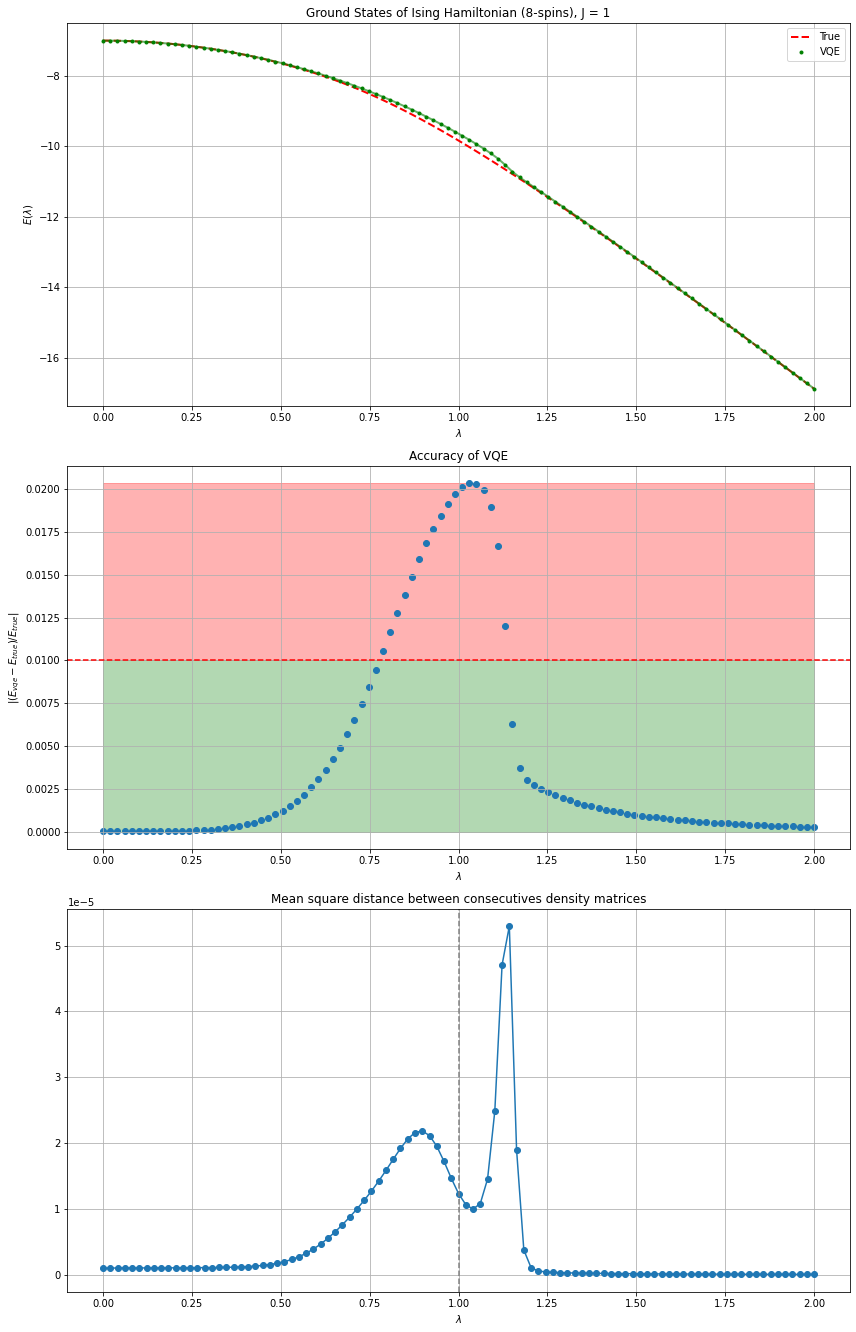

In [6]:
myvqe.show_results_isingchain()

In [7]:
myvqe.save('../data/vqe.pkl')